In [1]:
import pandas as pd
from pathlib import Path
import datetime as dt
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from ml.model import load_model_data

In [2]:
def to_datetime(date: str) -> dt.datetime:
    try:
        return dt.datetime.strptime(date, '%d/%m/%y')
    except ValueError:
        return dt.datetime.strptime(date, '%d/%m/%Y')

In [3]:
path = Path.cwd() / 'data' / 'soup_run_numbers_march_2021_update.tsv'
df = (pd.read_csv(path, sep='\t')
        .rename(columns={
            'Date': 'date',
            'Day': 'day',
            '1st Drop': 'first_drop',
            '2nd Drop': 'second_drop',
            'Total number of people fed': 'total'})
         .drop_duplicates()
         .set_index('date'))
df.head()

,day,first_drop,second_drop,total
date,,,,
10/08/17,Thu,50,30,80
21/08/17,Mon,70,27,97
02/09/17,Sat,60,23,83
03/09/17,Sun,75,25,100
06/09/17,Wed,45,20,65


In [4]:
df.index = df.index.map(to_datetime)
df = df.sort_values(by='date', ascending=True)
df

,day,first_drop,second_drop,total
date,,,,
2017-08-10,Thu,50,30,80
2017-08-21,Mon,70,27,97
2017-09-02,Sat,60,23,83
2017-09-03,Sun,75,25,100
2017-09-06,Wed,45,20,65
...,...,...,...,...
2021-03-01,Mon,15,12,27
2021-03-02,Tue,15,15,30
2021-03-03,Wed,20,10,30


In [17]:
df.iloc[300:350]

,day,first_drop,second_drop,total
date,,,,
2019-09-13,Fri,25,20,45
2019-09-14,Sat,30,15,45
2019-09-21,Sat,23,15,38
2019-10-03,Thu,28,20,48
2019-10-05,Sat,50,25,75
2019-10-07,Mon,35,25,60
2019-10-09,Wed,25,15,40
2019-10-11,Fri,35,15,50
2019-10-12,Sat,22,10,32


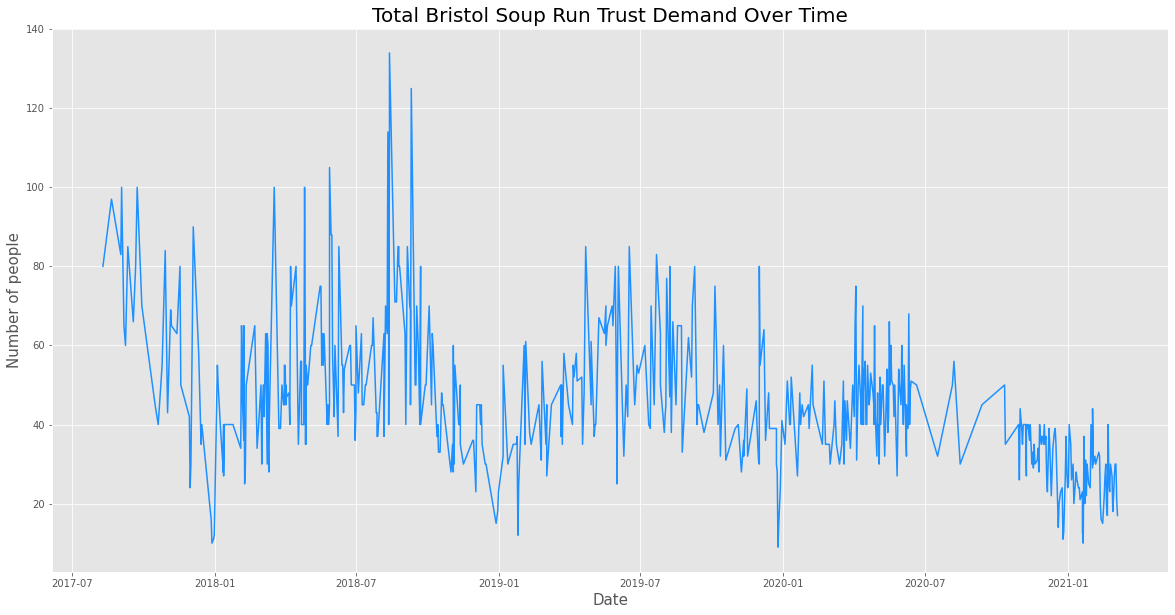

In [5]:
plt.figure(figsize=(20, 10))
plt.plot(df.total, color='dodgerblue')
plt.title('Total Bristol Soup Run Trust Demand Over Time', fontsize=20)
plt.ylabel('Number of people', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.savefig('img/total_demand_with_2021_data.png')
plt.show()

In [6]:
model_data = load_model_data(data_dir='models')
model_data

{'score': 12.225878351442129,
 'feat_imps': [('month', 0.2716380160613962),
  ('temp_avg', 0.1979915452936408),
  ('day_of_week', 0.13080596096899877),
  ('day_of_month', 0.0986649092294711),
  ('wind_speed_avg', 0.07779731895419213),
  ('humidity', 0.07226526917500768),
  ('year', 0.07064142444027245),
  ('precip_intensity_avg', 0.04308237513654092),
  ('precip_type', 0.03711318074047999)]}